<a href="https://colab.research.google.com/github/jayeshw28/apple-grading-sys/blob/main/Apple_Prediction_Pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [24]:
# Define paths
test_dir = '/content/drive/MyDrive/archive/AppleGradingData/Testing'

In [25]:
# Set image parameters
img_width, img_height = 224, 224
batch_size = 32

# Create image generator for testing
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Create test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1154 images belonging to 4 classes.


In [26]:
# Get class names
class_names = list(test_generator.class_indices.keys())
print(f"Classes: {class_names}")

Classes: ['Apple Green', 'Apple Red G1', 'Apple Red G2', 'Apple Yellow G1']


In [27]:
# Load the saved model
model = load_model('/content/drive/MyDrive/apple_grading_model.h5')
print("Model loaded successfully!")

Model loaded successfully!


In [28]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9049 - loss: 0.3099
Test Accuracy: 0.9393


In [29]:
# Get predictions for the test set
test_generator.reset()
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)

37/37 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step


In [30]:
# Get true labels
y_true = test_generator.classes

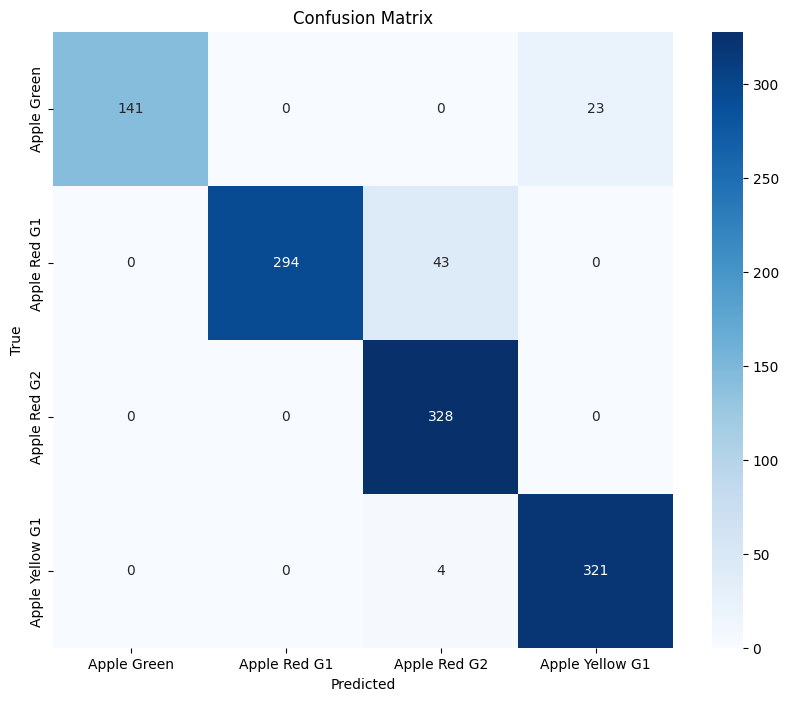


Classification Report:
                 precision    recall  f1-score   support

    Apple Green       1.00      0.86      0.92       164
   Apple Red G1       1.00      0.87      0.93       337
   Apple Red G2       0.87      1.00      0.93       328
Apple Yellow G1       0.93      0.99      0.96       325

       accuracy                           0.94      1154
      macro avg       0.95      0.93      0.94      1154
   weighted avg       0.95      0.94      0.94      1154



In [31]:
# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.savefig('confusion_matrix.png')
    plt.show()

    # Display classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=classes))

plot_confusion_matrix(y_true, y_pred, class_names)

In [32]:
# Function to predict grade for a new apple image
def predict_apple_grade(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescale the same way as our training data

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    predicted_class = class_names[predicted_class_index]
    confidence = prediction[0][predicted_class_index] * 100

    # Display results
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_class} (Confidence: {confidence:.2f}%)')
    plt.axis('off')
    plt.show()

    # Return results
    return {
        'grade': predicted_class,
        'confidence': confidence,
        'all_probabilities': {class_name: float(prediction[0][i])*100 for i, class_name in enumerate(class_names)}
    }


Testing model with sample images:

Testing image: 321_100.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


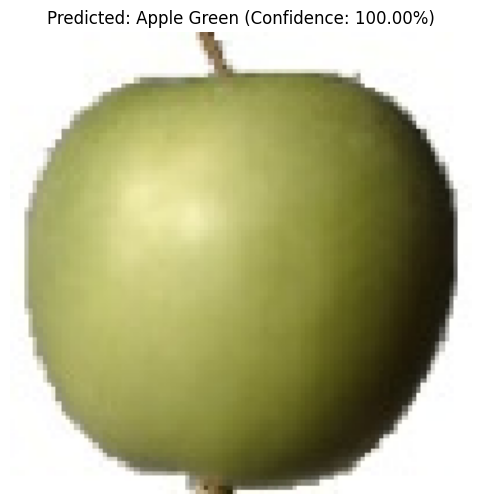

Grade: Apple Green
Confidence: 100.00%
All probabilities:
  Apple Green: 100.00%
  Apple Red G1: 0.00%
  Apple Red G2: 0.00%
  Apple Yellow G1: 0.00%

Testing image: 322_100.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


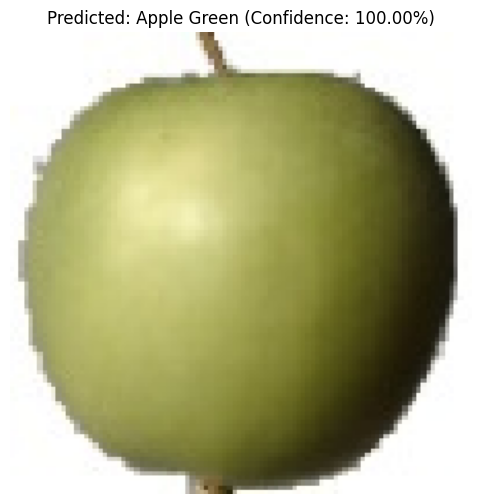

Grade: Apple Green
Confidence: 100.00%
All probabilities:
  Apple Green: 100.00%
  Apple Red G1: 0.00%
  Apple Red G2: 0.00%
  Apple Yellow G1: 0.00%

Testing image: 323_100.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


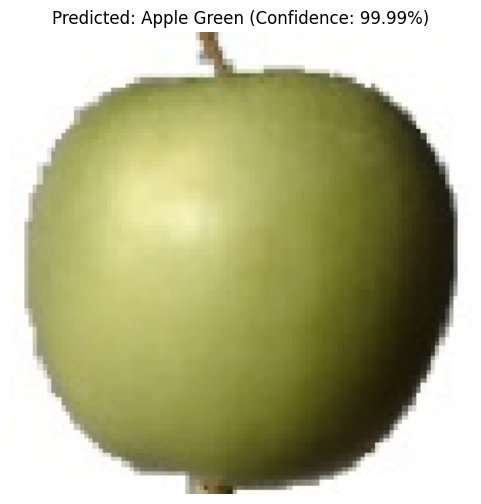

Grade: Apple Green
Confidence: 99.99%
All probabilities:
  Apple Green: 99.99%
  Apple Red G1: 0.00%
  Apple Red G2: 0.00%
  Apple Yellow G1: 0.01%

Testing image: 100_100.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


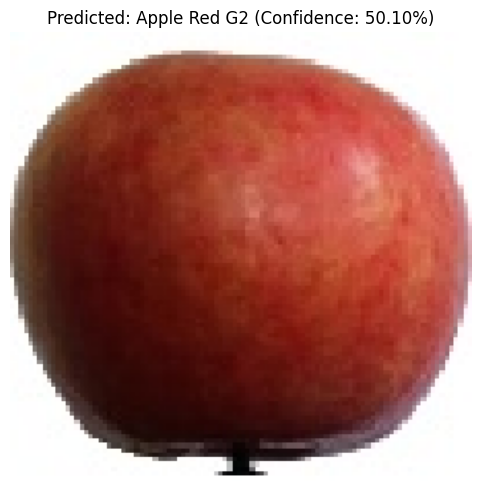

Grade: Apple Red G2
Confidence: 50.10%
All probabilities:
  Apple Green: 0.03%
  Apple Red G1: 49.85%
  Apple Red G2: 50.10%
  Apple Yellow G1: 0.01%

Testing image: 101_100.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


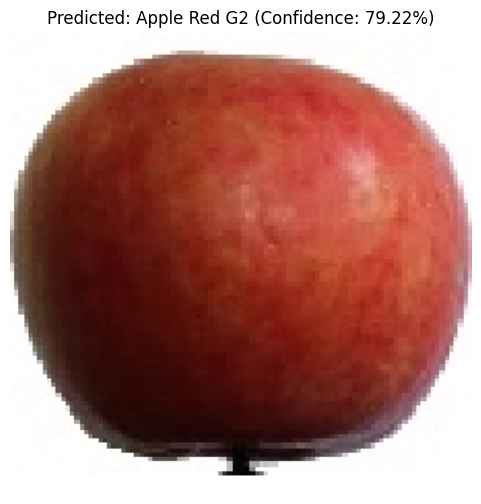

Grade: Apple Red G2
Confidence: 79.22%
All probabilities:
  Apple Green: 0.00%
  Apple Red G1: 20.77%
  Apple Red G2: 79.22%
  Apple Yellow G1: 0.00%

Testing image: 102_100.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


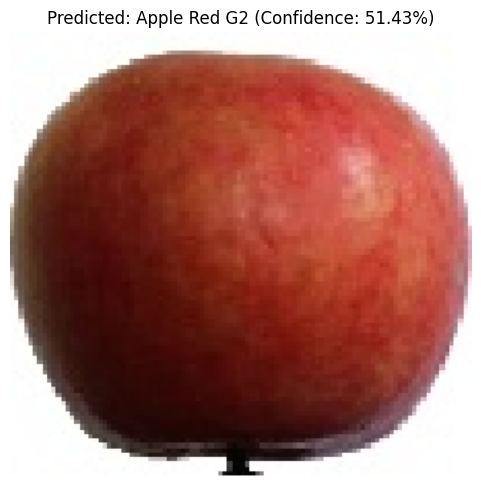

Grade: Apple Red G2
Confidence: 51.43%
All probabilities:
  Apple Green: 0.06%
  Apple Red G1: 48.49%
  Apple Red G2: 51.43%
  Apple Yellow G1: 0.02%

Testing image: 321_100.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


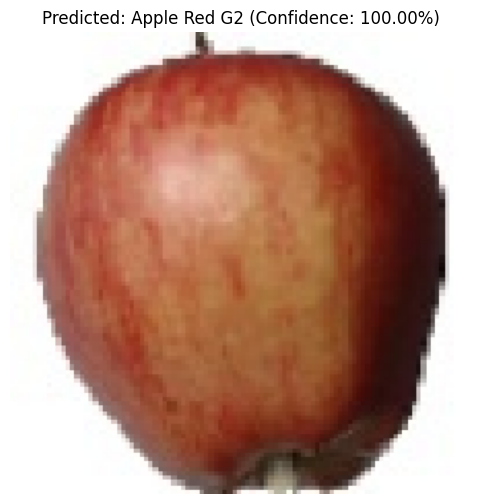

Grade: Apple Red G2
Confidence: 100.00%
All probabilities:
  Apple Green: 0.00%
  Apple Red G1: 0.00%
  Apple Red G2: 100.00%
  Apple Yellow G1: 0.00%

Testing image: 322_100.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


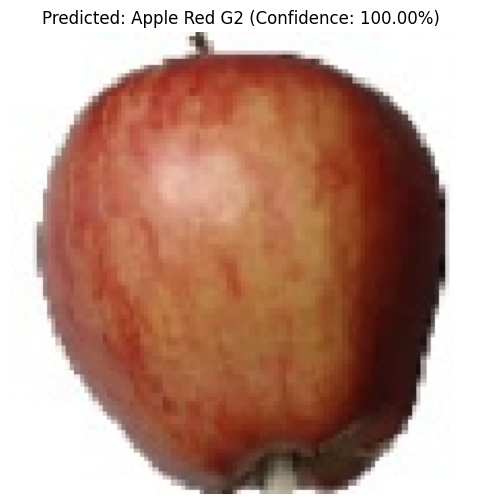

Grade: Apple Red G2
Confidence: 100.00%
All probabilities:
  Apple Green: 0.00%
  Apple Red G1: 0.00%
  Apple Red G2: 100.00%
  Apple Yellow G1: 0.00%

Testing image: 323_100.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


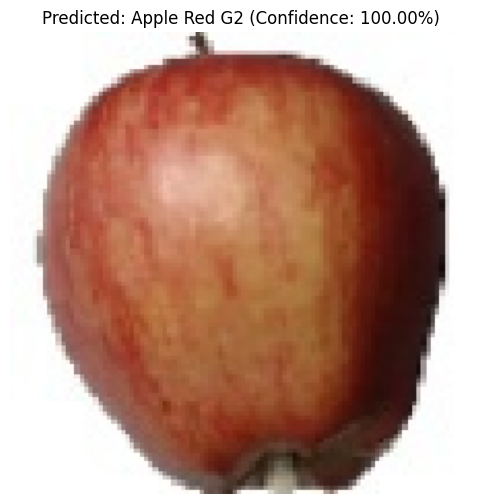

Grade: Apple Red G2
Confidence: 100.00%
All probabilities:
  Apple Green: 0.00%
  Apple Red G1: 0.00%
  Apple Red G2: 100.00%
  Apple Yellow G1: 0.00%

Testing image: 321_100.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


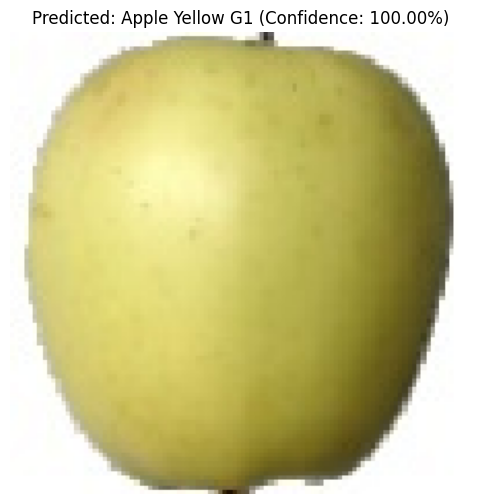

Grade: Apple Yellow G1
Confidence: 100.00%
All probabilities:
  Apple Green: 0.00%
  Apple Red G1: 0.00%
  Apple Red G2: 0.00%
  Apple Yellow G1: 100.00%

Testing image: 322_100.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


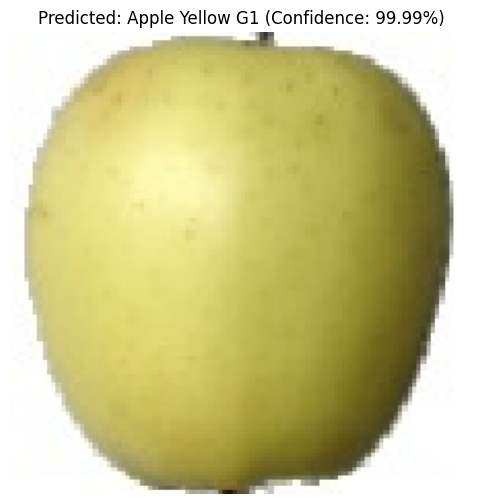

Grade: Apple Yellow G1
Confidence: 99.99%
All probabilities:
  Apple Green: 0.01%
  Apple Red G1: 0.00%
  Apple Red G2: 0.00%
  Apple Yellow G1: 99.99%

Testing image: 324_100.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


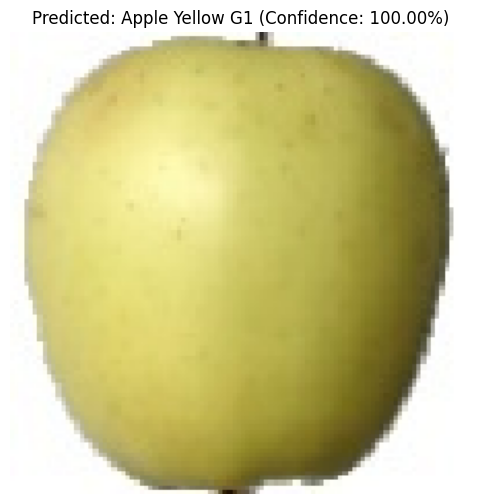

Grade: Apple Yellow G1
Confidence: 100.00%
All probabilities:
  Apple Green: 0.00%
  Apple Red G1: 0.00%
  Apple Red G2: 0.00%
  Apple Yellow G1: 100.00%


In [33]:
# Example: Test with a few images from the test dataset
def test_with_sample_images(num_samples=3):
    print("\nTesting model with sample images:")

    # Get file paths from the test directory
    all_image_paths = []
    for class_dir in os.listdir(test_dir):
        class_path = os.path.join(test_dir, class_dir)
        if os.path.isdir(class_path):
            image_files = os.listdir(class_path)[:num_samples]  # Take first few images from each class
            for img_file in image_files:
                if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    img_path = os.path.join(class_path, img_file)
                    all_image_paths.append(img_path)

    # Test each image
    for img_path in all_image_paths:
        print(f"\nTesting image: {os.path.basename(img_path)}")
        result = predict_apple_grade(img_path)
        print(f"Grade: {result['grade']}")
        print(f"Confidence: {result['confidence']:.2f}%")
        print("All probabilities:")
        for grade, prob in result['all_probabilities'].items():
            print(f"  {grade}: {prob:.2f}%")

# Run test with sample images
test_with_sample_images()

In [34]:
# Function to predict with a custom image path
def predict_custom_image():
    image_path = input("/content/green_test.jpeg")
    if os.path.exists(image_path):
        result = predict_apple_grade(image_path)
        print(f"\nGrade: {result['grade']}")
        print(f"Confidence: {result['confidence']:.2f}%")
        print("All probabilities:")
        for grade, prob in result['all_probabilities'].items():
            print(f"  {grade}: {prob:.2f}%")
    else:
        print("File not found. Please check the path and try again.")